CS7317 Using Machine Learning Tools 2020, Assignment 2: Breast Cancer Classification

This is the template for the submission of Assignment 2. Keep the numbering, headings and sequence intact. Add the code and text answers (Markdown cells) below the respective numbered heading.

Student name:Tak Yin Pang
Student ID:a1796036

Initialise environment, libraries, settings, etc.:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


Load the data set:

In [2]:
data_set = datasets.load_breast_cancer()
data = np.asarray(data_set.data)
target = np.asarray(data_set.target)
new_target = target[: ,np.newaxis ]
new_data = np.append(data,new_target,axis= 1)

df_data = pd.DataFrame(new_data)

data_good = [new_data[i] for i in range(len(new_data)) if new_data[i][30] == 1 ]

df_good = pd.DataFrame(data_good)

data_bad = [new_data[i] for i in range(len(new_data)) if new_data[i][30] == 0 ]

df_bad = pd.DataFrame(data_bad)

column_name = ['radius','texture','perimeter','area','smoothness',
 'compactness','concavity','concave points','symmetry','fractal dimension']
column2_name = ['mean','standard error','worst']

k = 0
for i in column2_name:
    for j in column_name:
        df_data.rename(columns={k:(j+' ('+i+')')},inplace =True)
        df_good.rename(columns={k:(j+' ('+i+')')},inplace =True)
        df_bad.rename(columns={k:(j+' ('+i+')')},inplace =True)
        k = k+1
df_good.rename(columns={30:'target'},inplace =True)
df_bad.rename(columns={30:'target'},inplace =True)
df_data.rename(columns={30:'target'},inplace =True)

In [3]:
df_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   radius (mean)                       357 non-null    float64
 1   texture (mean)                      357 non-null    float64
 2   perimeter (mean)                    357 non-null    float64
 3   area (mean)                         357 non-null    float64
 4   smoothness (mean)                   357 non-null    float64
 5   compactness (mean)                  357 non-null    float64
 6   concavity (mean)                    357 non-null    float64
 7   concave points (mean)               357 non-null    float64
 8   symmetry (mean)                     357 non-null    float64
 9   fractal dimension (mean)            357 non-null    float64
 10  radius (standard error)             357 non-null    float64
 11  texture (standard error)            357 non-n

In [4]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   radius (mean)                       212 non-null    float64
 1   texture (mean)                      212 non-null    float64
 2   perimeter (mean)                    212 non-null    float64
 3   area (mean)                         212 non-null    float64
 4   smoothness (mean)                   212 non-null    float64
 5   compactness (mean)                  212 non-null    float64
 6   concavity (mean)                    212 non-null    float64
 7   concave points (mean)               212 non-null    float64
 8   symmetry (mean)                     212 non-null    float64
 9   fractal dimension (mean)            212 non-null    float64
 10  radius (standard error)             212 non-null    float64
 11  texture (standard error)            212 non-n

1	Understand the dataset (15%)

1.1	Question: Briefly describe what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset and the example image in Figure 1. What could be the reasons for using the mean, standard error and maximum of each of the 10 parameters?

Answer:

1.radius: The radius of an individual nucleus

2.perimeter: The total distance between the snake points constitues the nuclear perimeter

3.area: The number of pixels on the interior of snake and one-half of the pixels in the perimeter

4.compactness: It is calculated by the formula perimeter^2/areas.

5.smoothness: The difference between the length of radial line and the mean length of the lines surounding it

6.concavity: It is measured by how the actual boundary of the nucleus lies on the inside of each chord.

7.concave points: It is similar to concavity but measures only the number of contour concavities.

8.symmetry: It is measured by the legnth difference between lines perpendicular to the major axis to the cell boundary. 

9.fractal dimension: It is approximated using the "coastline approximation" to measure the degree of boundary irregularity.

10.texture: The variance of the gray scale intensities in the component pixels 

Mean is the average value of the parameters which is an intuitive measure to see how the parameters are centered. 
Standard error is the measurement of the diviation of the parameters and maximum is the maximum value of the parameters. The reason of using these 3 statistic measure is that these measures help to find the outliners because we want to find the maligant cells. When the cell is normal, the parameters mean should be similar, the standard error should be small and the maximum value should be in normal range. 

1.2	Plot histograms of each of the 30 features, using two distributions, one for each class, in each diagram. Use 3 figures with 10 subplots each.

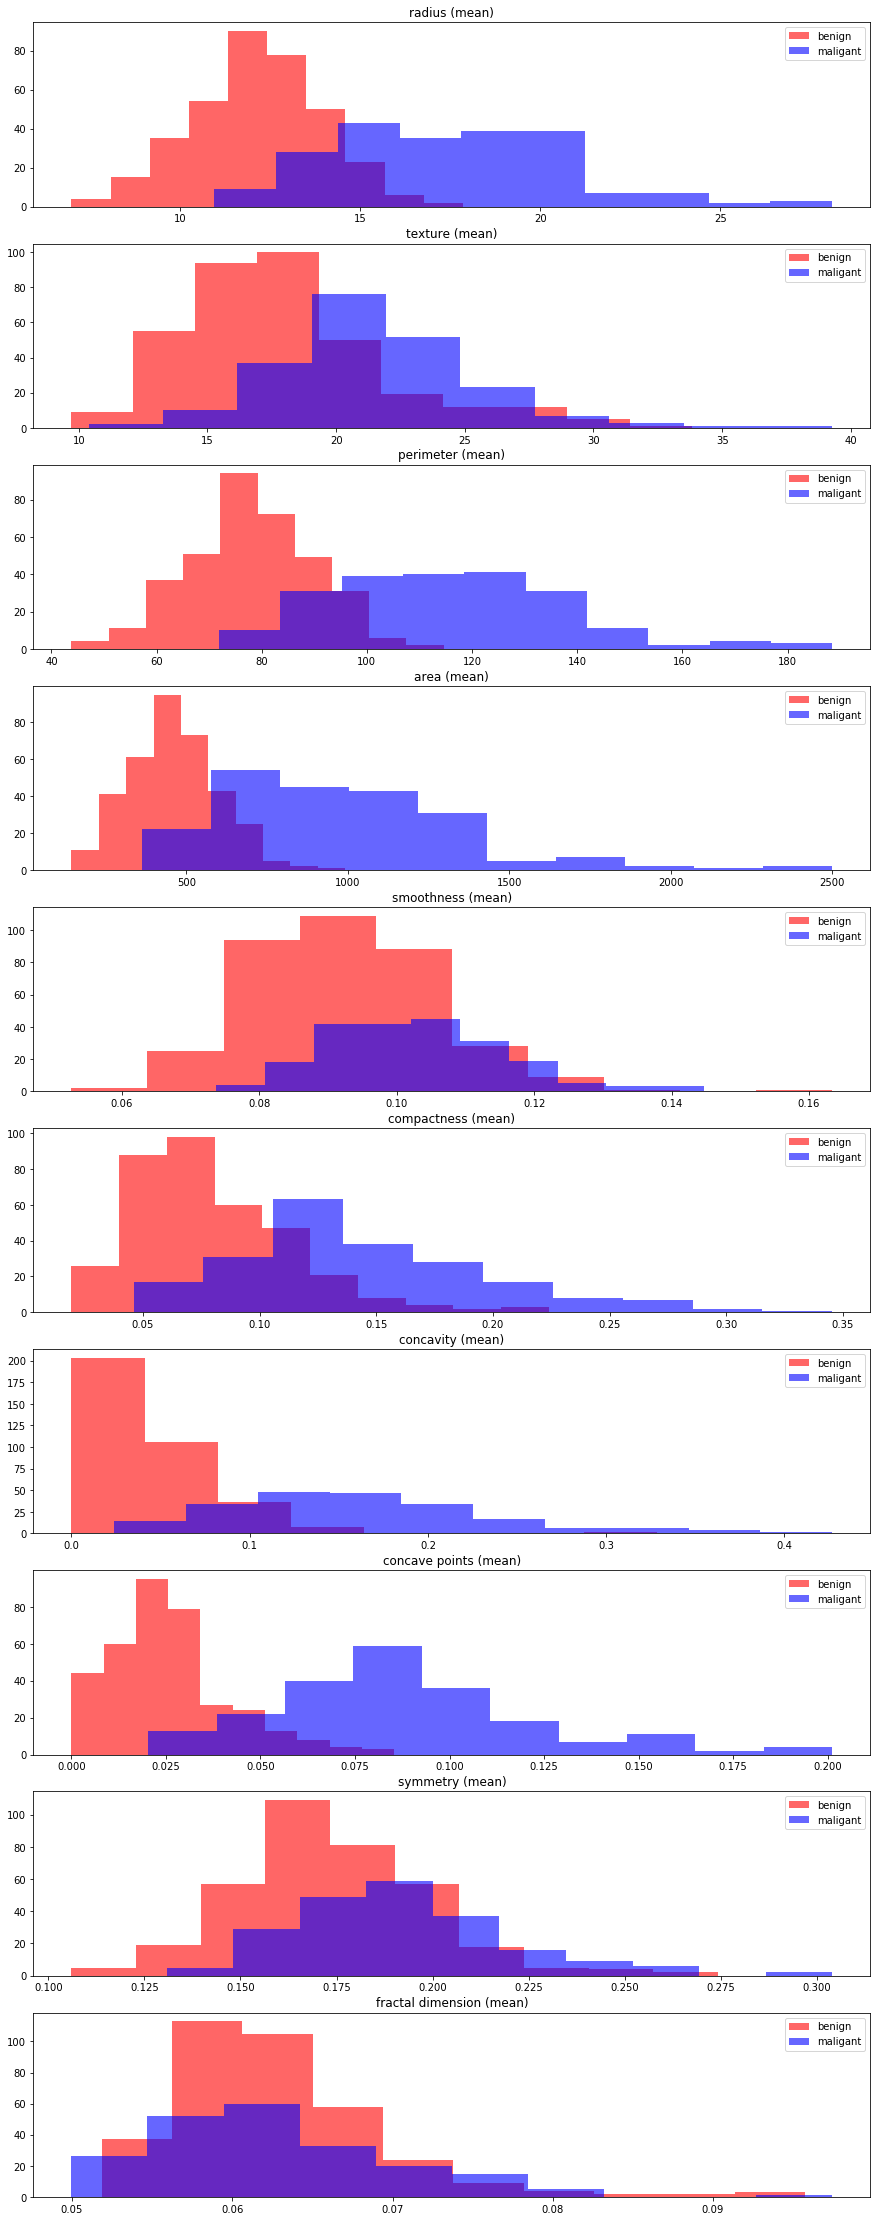

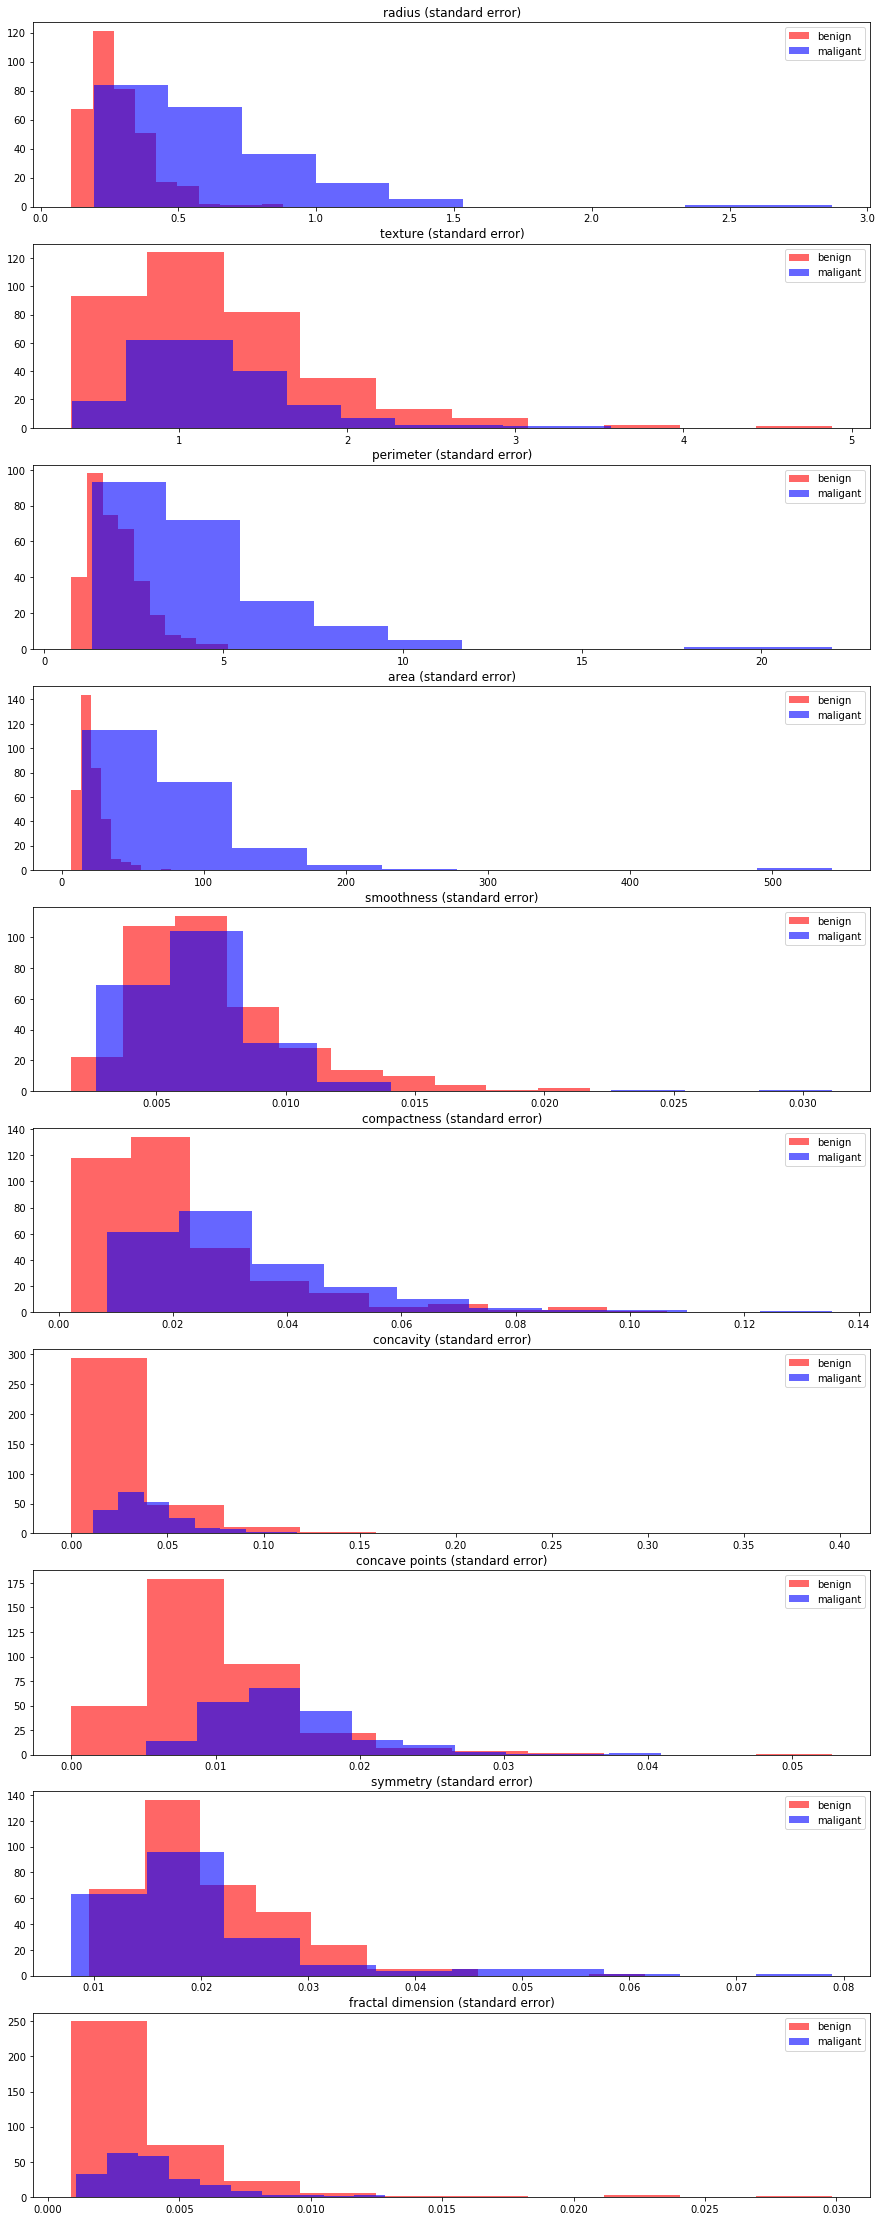

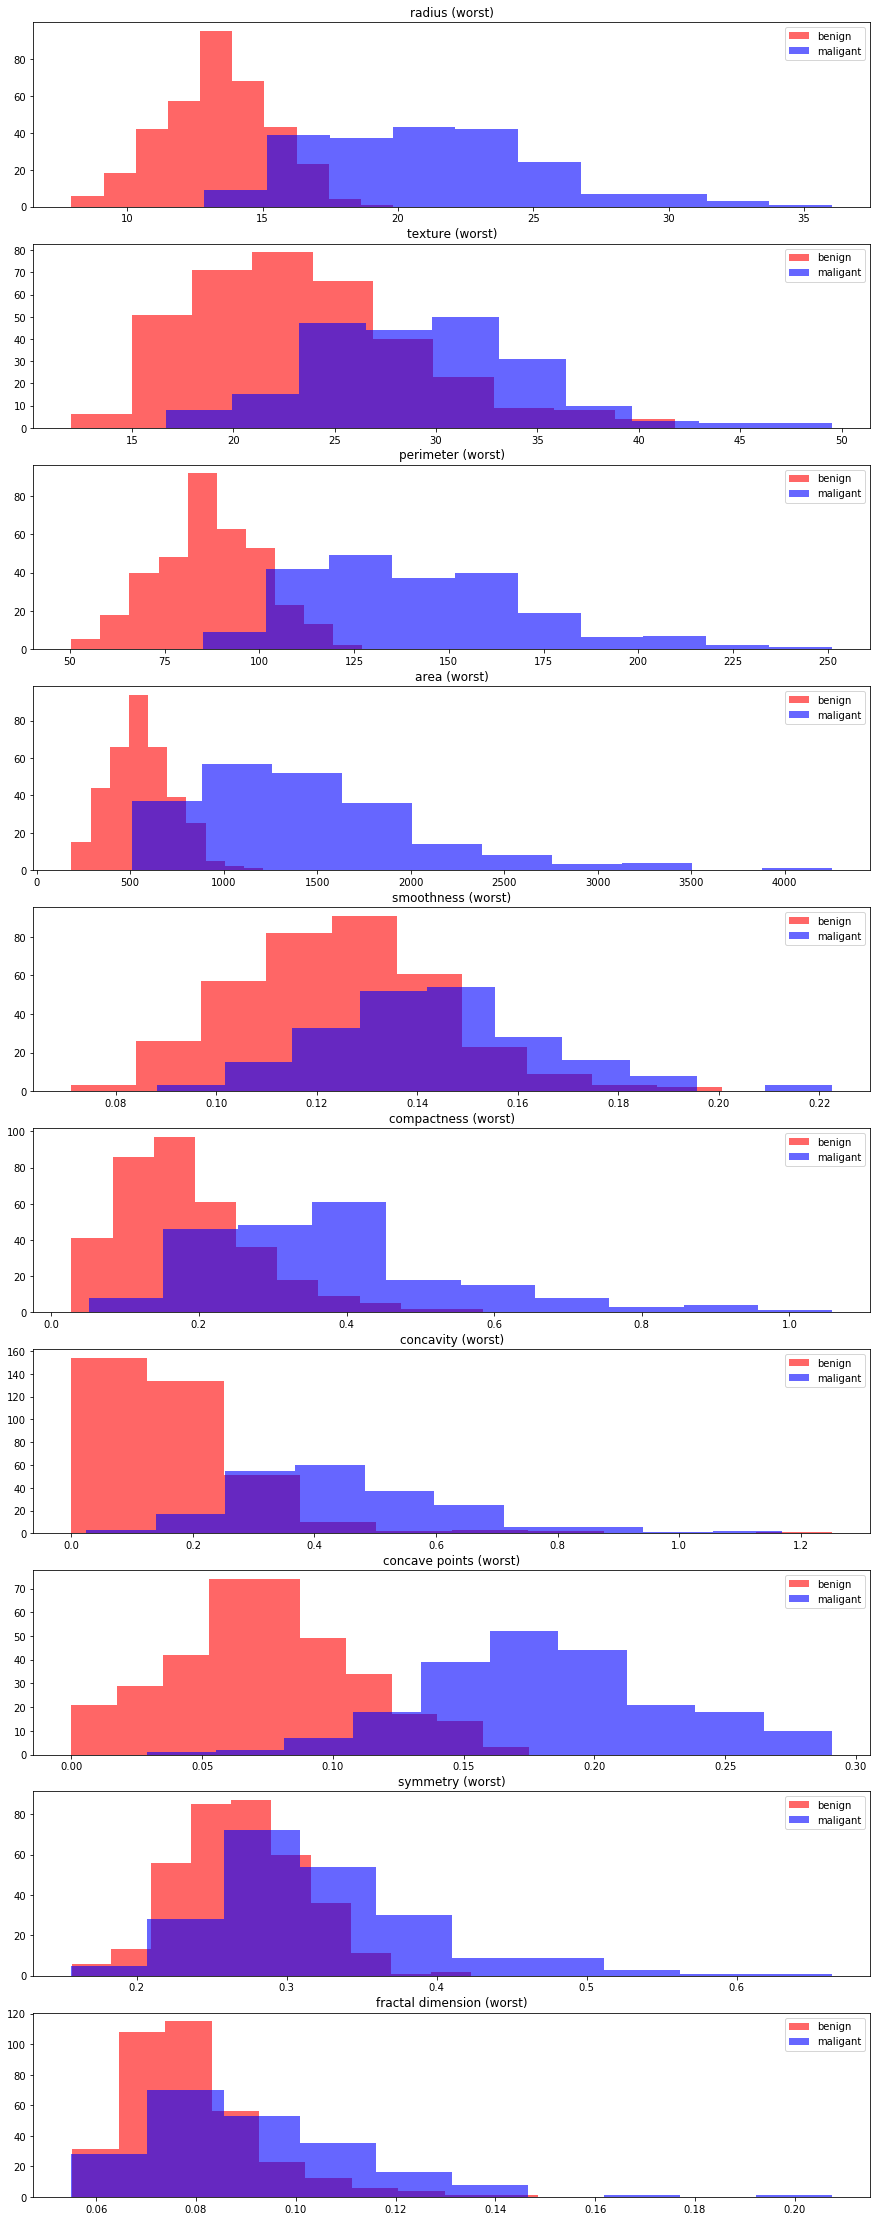

In [5]:
column_name = ['radius','texture','perimeter','area','smoothness',
 'compactness','concavity','concave points','symmetry','fractal dimension']

class_name = ['(mean)','(standard error)','(worst)']


for j,name in enumerate(class_name):
    #create a figures with 10 subplots
    fig, ax = plt.subplots(10, figsize=(15,40))
    
    for i,column in enumerate(column_name):
        ax[i].hist(df_good[column+' '+name],alpha = 0.6,color= 'r',label = 'benign')
        ax[i].hist(df_bad[column+' '+name],alpha = 0.6,color= 'b',label = 'maligant')
        ax[i].set_title(df_good.columns[i+j*10])
        ax[i].legend()

Answer:The above plots 3 figures with respect to mean, standard error and worst with 10 subplots with respect to 10 parameters. The Malignant data are showed in blue color while the Benign data are showed in red color. 

1.3	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

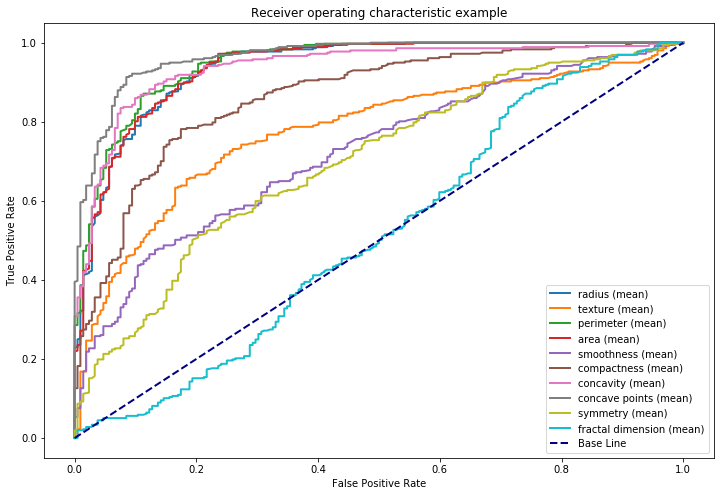

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

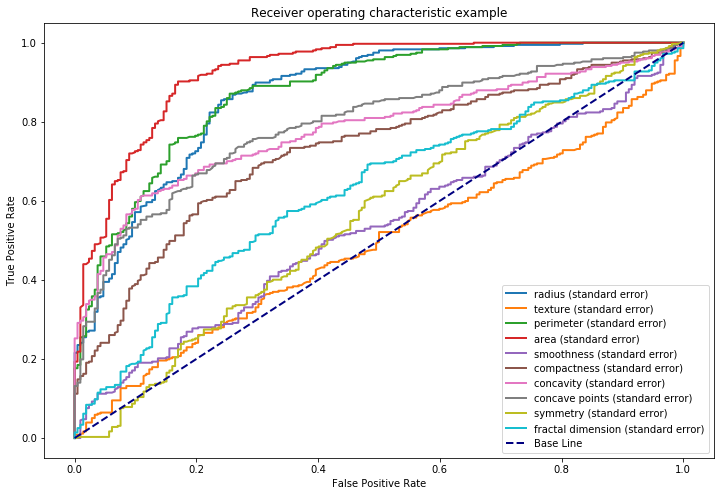

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

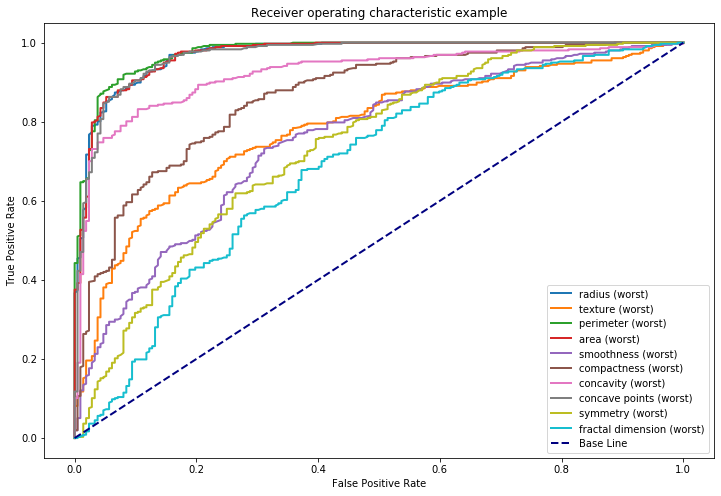

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
column_name = ['radius','texture','perimeter','area','smoothness',
 'compactness','concavity','concave points','symmetry','fractal dimension']

class_name = ['(mean)','(standard error)','(worst)']

for j,name in enumerate(class_name):
    #create a figures with respect to mean, standard error and worst 
    fig, ax = plt.subplots(1, figsize=(12,8))
    for i,column in enumerate(column_name):
        #fit the single column data and the target into logistic regression 
        clf = LogisticRegression(random_state=0).fit(df_data[column+' '+name][: ,np.newaxis ], df_data['target'])
        #find the confidence scores
        prob = clf.decision_function(df_data[column+' '+name][: ,np.newaxis ])
        #calculate the fpr and tpr using roc_curve function
        fpr, tpr, t = roc_curve(df_data['target'],prob)

        plt.figure()
        ax.plot(fpr,tpr,lw = 2, label=df_data.columns[i+j*10])
 
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Base Line')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    ax.legend(loc="lower right")


Answer:The above plots 3 figures with respect to mean, standard error and worst with each line represent a parameter. They are labeled in the right lower corner and the base line is plotted as well.

1.4	Question: Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.

Answer: Concave point(mean),radius(worst),perimeter(worst),area(worst),concave points(worst) are the top 5 candidate features. They show the largest area under the curve in ROC curves and also they show least overlapping area in the histograms as well.

1.5	Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.

In [7]:
Analysis_Point = (df_good.mean() + df_bad.mean())/2

print(Analysis_Point)

radius (mean)                          14.804677
texture (mean)                         19.759834
perimeter (mean)                       96.720392
area (mean)                           720.583306
smoothness (mean)                       0.097688
compactness (mean)                      0.112636
concavity (mean)                        0.103416
concave points (mean)                   0.056854
symmetry (mean)                         0.183547
fractal dimension (mean)                0.062774
radius (standard error)                 0.446582
texture (standard error)                1.215647
perimeter (standard error)              3.162125
area (standard error)                  46.903777
smoothness (standard error)             0.006988
compactness (standard error)            0.026860
concavity (standard error)              0.033910
concave points (standard error)         0.012459
symmetry (standard error)               0.020528
fractal dimension (standard error)      0.003849
radius (worst)      

2	Train a decision tree classifier (15%)

2.1	Construct a decision tree classifier using the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_leaf. Check the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly in one sentence.

In [8]:
dt_classifier = DecisionTreeClassifier(criterion='gini',
                                       random_state=0)

Answer:

min_samples_split: I will keep it as default. Since we are doing grid search for min_samples_leaf which determine ths samples split as well , we dont have to adjust this parameter. 

min_weight_fraction_leaf: I will keep it as default. The class imbalance in the dataset is not severe. 

max_features: I will keep it as default. There is only 30 features which is not computational demanding.

max_leaf_nodes:I will keep it as default. We do not have to limit the maximum leaf node in this small data set. 

min_impurity_decrease:I will keep it as default.There is no reason to set a value other than 0 before we evaluate the tree depth.

min_impurity_split:I will keep it as default.There is no reason to set a value other than 0 before we evaluate the tree depth.

class_weight:I will keep it as default. The class imbalance in the dataset is not severe.


2.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for decision tree classification? Are the different class sizes a problem, and if so what are you doing about it?

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_set.data,data_set.target,test_size =0.20, random_state = 2)

pipeline = Pipeline([('df_classifier', dt_classifier)])

#pipeline.fit(X_train, y_train)
print(pipeline)

Pipeline(memory=None,
         steps=[('df_classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)


Answer:The decision tree classification is indifferent to the scaled data. The features scale do not affect the splitting in decision tree classifier. The different class sizes are not a severe problem and it is around a 4:6 ratio which is normal. 

2.3	Perform a grid search using five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples per leaf (min_samples_leaf). Choose the value range yourself. Question: What is the rationale for your choice?

In [10]:
#cross_val_score(clf, data_set.data, data_set.target, cv=10)

param_grid = {'max_depth': range(1,20), 'min_samples_leaf': range(1,20)}

# run grid search
grid_search = GridSearchCV(dt_classifier, param_grid=param_grid, cv = 5)
grid_search.fit(X_train, y_train)

df_result = pd.DataFrame(grid_search.cv_results_)
df_result.sort_values(by=['rank_test_score']).head(10)

print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


Answer:There is only 569 row of data in the dataset which is far less then 
20(min_samples_leaf)*(2^(20+1)-1)(maximum number of tree node with 20 depth).
So picking the max_depth and min_samples_leaf in range from 1 to 20 are good enough to select the best hyperparameter.

3	Evaluate the decision tree classifier (20%)

3.1	Calculate the confusion matrix, precision and recall of the final classifier. Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?

In [11]:
#use test set data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

decision_tree_classifier = grid_search.best_estimator_

#pipeline_tree = Pipeline([('scaler',StandardScaler()),
#                     ('df_classifier', decision_tree_classifier)])

pipeline_tree = Pipeline([('df_classifier', decision_tree_classifier)])

pipeline_tree.fit(X_train, y_train)

y_pred = pipeline_tree.predict(X_test)

c_m = confusion_matrix(y_test, y_pred)

print(f'The confusion matrix is :\n{confusion_matrix(y_test, y_pred)}')
print(f'The precision score is: {precision_score(y_test, y_pred)}')
print(f'The recall score is: {recall_score(y_test, y_pred)}')

print(f'The chance of failing to detect a sample with cancer is:{round((c_m[0,1]/(c_m[0,1]+c_m[0,0]))*100,3)}%')

The confusion matrix is :
[[43  2]
 [ 5 64]]
The precision score is: 0.9696969696969697
The recall score is: 0.927536231884058
The chance of failing to detect a sample with cancer is:4.444%


Answer:
Since negative label is the maligant class, the chance of failing to detect a sample with cancer is the false positive rate which is calculate by (False Positive)/(False Positive+True Negative) = (2/(2+43))*100% = 4.444%. 

The classifier has a high precision score 0.9697 which for 66 samples are predicted as positive, only 2 of the predictions is incorrect. That means when the classifier is accurate on predicting the positive sample is high, 96.97%. While the weakness of the classifier is that it misclassifies the benign cell as malignant cell in a high rate, (1-recall)*100% = 7.25%.Also 2 samples malignant cell are misclassified as benign cell which is serious in this case because early treatment of cancer patient is very important. 

3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

[Text(571.9499999999999, 782.784, 'X[22] <= 105.95\ngini = 0.465\nsamples = 455\nvalue = [167, 288]'),
 Text(362.7, 608.832, 'X[27] <= 0.158\ngini = 0.088\nsamples = 282\nvalue = [13, 269]'),
 Text(223.2, 434.88, 'X[27] <= 0.135\ngini = 0.043\nsamples = 273\nvalue = [6, 267]'),
 Text(111.6, 260.928, 'X[13] <= 46.315\ngini = 0.015\nsamples = 260\nvalue = [2, 258]'),
 Text(55.8, 86.976, 'gini = 0.008\nsamples = 257\nvalue = [1, 256]'),
 Text(167.39999999999998, 86.976, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(334.79999999999995, 260.928, 'X[1] <= 20.785\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(279.0, 86.976, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(390.59999999999997, 86.976, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(502.2, 434.88, 'X[21] <= 23.47\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(446.4, 260.928, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(558.0, 260.928, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(781.1999999999999, 6

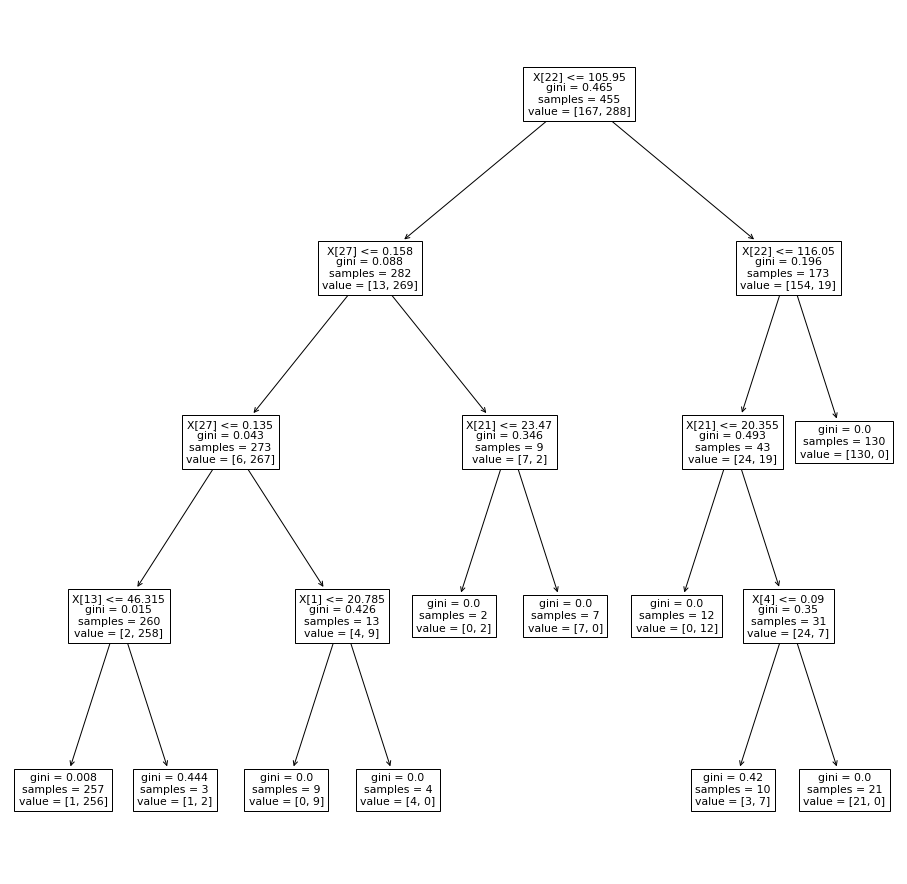

In [12]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(16, 16))
tree.plot_tree(decision_tree_classifier, ax=ax)


Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

Answer:
The structure is a binary tree structure with the left branch larger than the right branch. 

X[27]<= 0.428 means X[27] is the split attribute and 0.428 is the split value. gini is the probability of labeling the sample incorrectly if we randomly label it and which is calculated as 1-(165/455)^2-(290/455)^2 = 0.462. samples is the total number of samples in that tree node. value is the number of labels with respect to the categories which is malignant class and benign class in this case. 

The initial candidate features are 7,20,22,23,27 which X[22] and X[27] appear in the first 2 layers of the decision tree. I think it matches the initial guess. 

3.3	Display the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. 

In [13]:
decision_tree_classifier.feature_importances_

array([0.        , 0.02716458, 0.        , 0.        , 0.03256098,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00315706, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06612392, 0.81124121, 0.        , 0.        ,
       0.        , 0.        , 0.05975226, 0.        , 0.        ])

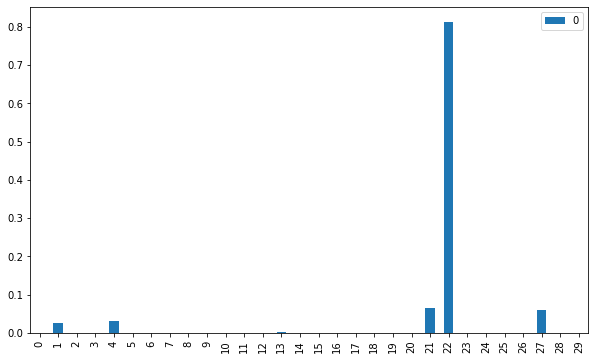

In [14]:
importances = pd.DataFrame(decision_tree_classifier.feature_importances_)
importances.plot.bar(figsize = (10,6))

The top five important features are 1,4,21,22,27 which are texture (mean), smoothness (mean), texture (worst), perimeter (worst) and concave points (worst)

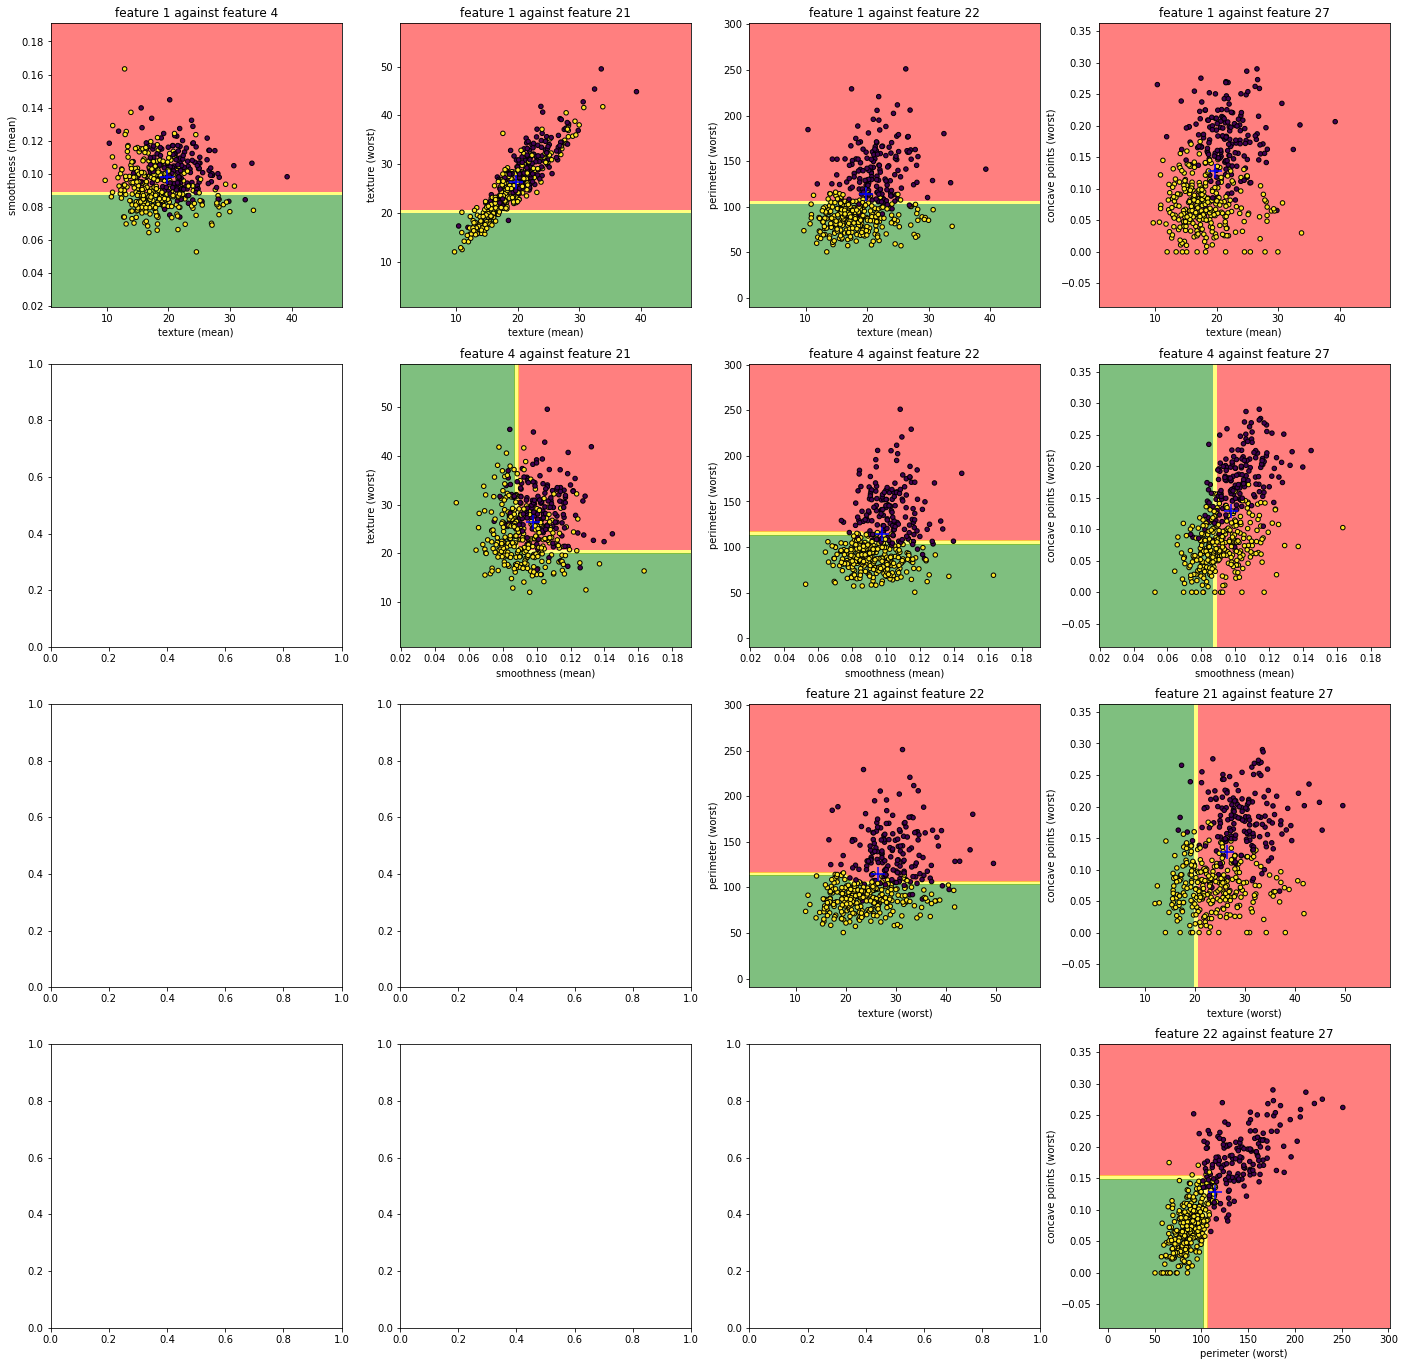

In [15]:
feature_list = [1,4,21,22,27]

f, ax = plt.subplots(4,4, figsize=(24, 24))
row = 0
for p in feature_list:
    col = row
    for q in feature_list:
        if p<q:
            x_min, x_max = X_train[:,p].min(), X_train[:,p].max()
            y_min, y_max = X_train[:,q].min(), X_train[:,q].max()
            x_range = x_max-x_min
            y_range = y_max-y_min

            xx, yy = np.meshgrid(np.arange(x_min-x_range*0.3, x_max+x_range*0.3, x_range/20),
                                 np.arange(y_min-y_range*0.3, y_max+y_range*0.3, y_range/20))

            column_name = ['radius','texture','perimeter','area','smoothness',
             'compactness','concavity','concave points','symmetry','fractal dimension']

            class_name = ['(mean)','(standard error)','(worst)']
            
            final = []
            for k in range(len(xx.ravel())):
                temp = []
                for j,name in enumerate(class_name):
                    #fig, ax = plt.subplots(1, figsize=(12,8))
                    for i,column in enumerate(column_name):
                        if j*10+i == p:
                            p_column = column + ' ' + name
                            temp.append(xx.ravel()[k])
                        elif j*10+i == q:
                            q_column = column + ' ' + name
                            temp.append(yy.ravel()[k])
                        else:
                            temp.append(Analysis_Point[column+' '+name])
                final.append(temp)

            Z = pipeline_tree.predict(final)
            Z = Z.reshape(xx.shape)
          
            #ax[row][col].contourf(xx, yy, Z, alpha=0.5,cmap='RdYlGn',levels = 3)
            ax[row][col].contourf(xx, yy, Z, alpha=0.5,colors=['red','yellow','green'],levels = 2)
            ax[row][col].scatter(X_train[:,p], X_train[:,q],c = y_train,s=20, edgecolor='k')
            ax[row][col].scatter(Analysis_Point[p_column], Analysis_Point[q_column],marker = '+',c = 'b',s=200, edgecolor='k')
            ax[row][col].set_title('feature '+str(p)+' against feature '+str(q))
            ax[row][col].set_xlabel(p_column)
            ax[row][col].set_ylabel(q_column)
            col +=1
    row+=1

3.4	Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern? Why are there few 2D scatterplots with only one class shown as prediction contour?

Answer:The class is differentiated quite well which Benign class is mainly located near the lower part or left side while Malignant class lies mainly on the upper part or right side of the graph. It draws a slight stair pattern to in plot feature 4 against feature 22 and plot feature 21 against feature 22 but most of them are rigid rectangular pattern with one of them is "L" shape pattern. One of the scatterplots shows only Malignant class, I suspect the two features are not important enough and other features dominant the classification.

4	Train a support vector classifier with RBF kernel (15%)

4.1	Construct a support vector classifier with a radial basis function kernel. Below, you will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keep the default value or select a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.

In [16]:
SVC_clf = SVC(kernel='rbf')

Answer:

tol: I will select the default value. There is no good reason to pick a value other than 1e-3. 

class_weight:It is optional parameter and I will not select balanced here. The class imbalance in the dataset is not severe.

max_iter:It is optional parameter and I will not set any limit on the maximum iteration. The dataset is not large and it is not computational demanding. 

4.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for support vector classification? Are the different class sizes a problem, and if so what are you doing about it?

In [17]:
pipeline_SVC = Pipeline([('scalor',StandardScaler()),
                     ('svm_classifier', SVC_clf)])

#pipeline_SVC.fit(X_train, y_train)

print(pipeline_SVC)

Pipeline(memory=None,
         steps=[('scalor',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


Answer:The data need to be scaled for support vector classification because large unscaled data may dominate the calculation of distance from the hyperplane in SVM. Also, the scaled data simplify the calculation in the process.

4.3	Perform a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. Choose the value ranges yourself. Question: What is the rationale for your choice?

In [18]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000], 
              'gamma': [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000] }

# run grid search
grid_search = GridSearchCV(SVC_clf, param_grid=param_grid, cv = 5)
grid_search.fit(X_train, y_train)

df_result = pd.DataFrame(grid_search.cv_results_)
print(df_result.sort_values(by=['rank_test_score']).head(5))

print(grid_search.best_estimator_)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
57       0.002152      0.000170         0.000404        0.000031      100   
78       0.004382      0.000731         0.000345        0.000005    10000   
67       0.002328      0.000241         0.000382        0.000006     1000   
99       0.037374      0.019313         0.000382        0.000025  1000000   
88       0.005241      0.000963         0.000362        0.000007   100000   

   param_gamma                          params  split0_test_score  \
57       1e-05      {'C': 100, 'gamma': 1e-05}           0.934066   
78       1e-06    {'C': 10000, 'gamma': 1e-06}           0.956044   
67       1e-06     {'C': 1000, 'gamma': 1e-06}           0.923077   
99       1e-07  {'C': 1000000, 'gamma': 1e-07}           0.967033   
88       1e-07   {'C': 100000, 'gamma': 1e-07}           0.956044   

    split1_test_score  split2_test_score  split3_test_score  \
57           0.967033           0.978022           0.967033

Answer:
https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
"We  found  that  trying  exponentially  growing  sequences of C and γ is a practical  method  to  identify  good  parameters  (for  example,C=  2^−5,2^−3,...,2^15,γ= 2^−15,2^−13,...,2^3)."

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
"In practice, a logarithmic grid from 10^-3 to 10^3 is usually sufficient."

When choosing the value range, I reference the above link. Combining the above 2 statement, I select a range from 10^-3 to 10^3 while extending the range of C to larger value and the range of gamma to smaller value. 

5	Evaluate the support vector classifier (20%)

5.1	Calculate the confusion matrix, precision and recall of the final classifier. Question: Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

SVC_classifier = grid_search.best_estimator_

pipeline_SVC = Pipeline([('scaler',StandardScaler()),
                     ('svm_classifier', SVC_classifier)])

pipeline_SVC.fit(X_train, y_train)

y_pred = pipeline_SVC.predict(X_test)

c_m = confusion_matrix(y_test, y_pred)

print(f'The confusion matrix is :\n{confusion_matrix(y_test, y_pred)}')
print(f'The precision score is: {precision_score(y_test, y_pred)}')
print(f'The recall score is: {recall_score(y_test, y_pred)}')

print(f'The chance of failing to detect a sample with cancer is:{round((c_m[0,1]/(c_m[0,1]+c_m[0,0]))*100,3)}%')

The confusion matrix is :
[[41  4]
 [ 0 69]]
The precision score is: 0.9452054794520548
The recall score is: 1.0
The chance of failing to detect a sample with cancer is:8.889%


Answer: 

Since negative label is the maligant class, the chance of failing to detect a sample with cancer is the false positive rate which is calculate by (False Positive)/(False Positive+True Negative) = (4/(4+41))*100% = 8.889%. 

The classifier has a high recall score 1 which for 69 samples are actually positive all predicted as positive. That means that the classifier is good on not misclassify benign as malignant cell. While the weakness of the classifier is that the precision score is not that high 0.9452, and it misclassified 4 malignant samples as benign cell out of 45 malignant sample which result in a high chance of failing to detect a sample with cancer 8.889%. 

5.2	Display the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, use a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. 

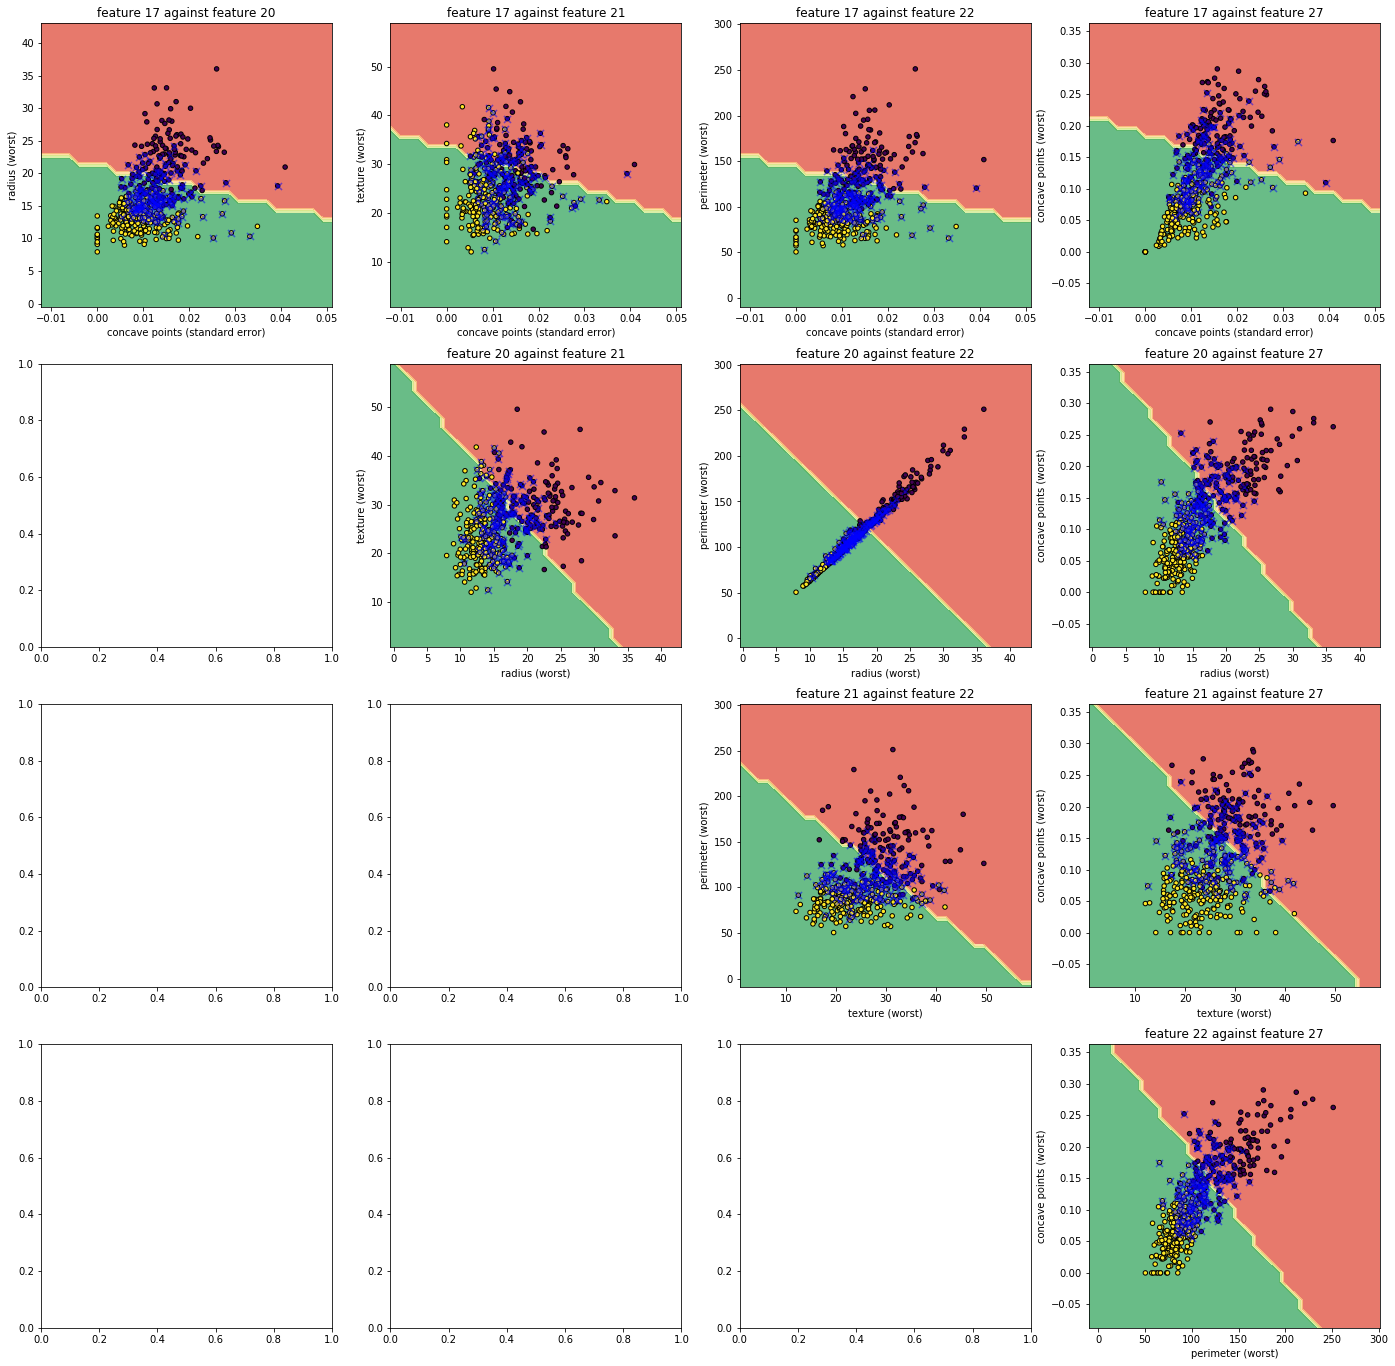

In [20]:
#Concave point(mean),perimeter(worst),area (worst),radius (worst), concave points (worst)
#7,20,22,23,27

#clf1 = DecisionTreeClassifier(max_depth=4)

# Plotting decision regions
feature_list = [17,20,21,22,27]

f, ax = plt.subplots(4,4, figsize=(24, 24))
row = 0
for p in feature_list:
    col = row
    for q in feature_list:
        if p<q:
            x_min, x_max = X_train[:,p].min(), X_train[:,p].max()
            y_min, y_max = X_train[:,q].min(), X_train[:,q].max()
            x_range = x_max-x_min
            y_range = y_max-y_min

            xx, yy = np.meshgrid(np.arange(x_min-x_range*0.3, x_max+x_range*0.3, x_range/20),
                                 np.arange(y_min-y_range*0.3, y_max+y_range*0.3, y_range/20))

            #print(np.c_[xx.ravel(), yy.ravel()])
            #Analysis_Point['concave points (mean)']

            column_name = ['radius','texture','perimeter','area','smoothness',
             'compactness','concavity','concave points','symmetry','fractal dimension']

            class_name = ['(mean)','(standard error)','(worst)']
            #print(xx.ravel())
            final = []
            for k in range(len(xx.ravel())):
                temp = []
                for j,name in enumerate(class_name):
                    #fig, ax = plt.subplots(1, figsize=(12,8))
                    for i,column in enumerate(column_name):
                        if j*10+i == p:
                            p_column = column + ' ' + name
                            temp.append(xx.ravel()[k])
                        elif j*10+i == q:
                            q_column = column + ' ' + name
                            temp.append(yy.ravel()[k])
                        else:
                            temp.append(Analysis_Point[column+' '+name])
                final.append(temp)

            #print(final)

            Z = pipeline_SVC.predict(final)
            Z = Z.reshape(xx.shape)
            #print(str(p)+' '+str(q))
            #print(Z)
            
            ax[row][col].contourf(xx, yy, Z, alpha=0.7,cmap='RdYlGn',levels = 3)
            ax[row][col].scatter(X_train[:,p], X_train[:,q],c = y_train,s=20, edgecolor='k')
            
            sv = pipeline_SVC.steps[0][1].inverse_transform(SVC_classifier.support_vectors_)
            ax[row][col].scatter(sv[:,p], sv[:,q],s=50,alpha = 0.5, c='b', marker = 'x', linewidths='3')
            
            ax[row][col].set_title('feature '+str(p)+' against feature '+str(q))
            ax[row][col].set_xlabel(p_column)
            ax[row][col].set_ylabel(q_column)
            col +=1
    row+=1
#plt.show()


Answer:
The green region is the benign class and red region is the malignant class. The decision boundary is clearly ploted and seperates the classes nicely. The support vectors are marked blue X on it. 

5.3	Question: What is the meaning of the support vectors? Where can we see their purpose in the diagrams?

Answer:The support vectors help to define the margin of the hyperplane by maximizing the distance bewteen the support vectors and hyperplane.We can see that most of the support vectors lie closely to the decision boundary which equivalent to the hyperplane in the both side.  

6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?

Answer:
For decision tree classifier, it builds a binary tree structure by spliting the dataset with a best split value on one of the attributes which gives the split datasets a best information gain or gini coefficient(we are using gini in this assignment).It constructs a rectangular like hyperspace in the n features dimension space to seperate the classes. 
For support vector classifier, it constructs a (n-1)dimension hyperplane with the help of the support vector on the n features dimension space as the decision boundary to seperate the classes and it sometimes involve kernel trick when dealing with non-linear data space. 

Similarties: Both of the classifiers construct hyperplane in the features space to split the data. 
Differences: SVC has to scaled the features before fitting to model while decision tree classifier does not need data scaling. There is feature_importances_ built in decision tree classifier but not in SVC. 

The hyperplanes created by the classifier extend along the parameter space so that the area far away from the dense sampling can also be classified. 


6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?

Answer: The two classifiers make no assumption on the data and I do not see any sources of bias. From the pecision score and recall score on the vaildation set, both models generalized well in this dataset (both score > 0.9)

6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?

Answer:
There is 6 features in the decision tree which are texture (mean),smoothness (mean),area (standard error),texture (worst),perimeter (worst),concave points (worst). There is more number of features in my classifier and the selection of features is different. The accuracy of my classifier(>90%) is higher. 

There is no one good set of features but some of the features are more important and are selected more frequent in different combination than the other features. Some of the features like feature 1,4,7,13,17,20,21,22,23,27 are more like to be picked from my observation. 